In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"muskang","key":"c9608ea0afbb3c22bb37a81773ee8c86"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d vbookshelf/v2-plant-seedlings-dataset --force

100% 3.18G/3.19G [01:15<00:00, 40.3MB/s]
100% 3.19G/3.19G [01:16<00:00, 45.1MB/s]


In [0]:
import zipfile
with zipfile.ZipFile("v2-plant-seedlings-dataset.zip","r") as zip_ref:
    zip_ref.extractall("plant-seedlings-data")

In [5]:
import os
labels = os.listdir("plant-seedlings-data")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

No. of labels: 13
-----------------


In [6]:
for label in labels:
    print("{}, {} files".format(label, len(os.listdir("plant-seedlings-data/"+label))))

Charlock, 452 files
Maize, 257 files
Loose Silky-bent, 762 files
Common wheat, 253 files
nonsegmentedv2, 12 files
Fat Hen, 538 files
Scentless Mayweed, 607 files
Cleavers, 335 files
ShepherdΓÇÖs Purse, 274 files
Sugar beet, 463 files
Black-grass, 309 files
Common Chickweed, 713 files
Small-flowered Cranesbill, 576 files


In [0]:
!rm -rf /content/plant-seedlings-data/nonsegmentedv2

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

In [0]:
path = "/content/plant-seedlings-data"
size = 224 #Files in ImageNet are of size 224, and as that is what we are training on, size =224.
bs = 64

In [0]:
#dataloader
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  valid_pct=0.2, size=size, bs=bs)

In [11]:
data.normalize(imagenet_stats) 
#Normaize so that all channels are given equal weightage, as they are all fitted in same range
#ImageNet stats gives the mean, medians, std. deviations based on which the normalization is done
'''
Reason for normalisation:
For Activation functions like sigmoid and tanh, the output after -3 and 3 does not change even with 
massive changes in input.
The output will remain the same for 10 and 1000. 
Hence, normalizeing it, will get it in the range of -1,1 which will show proper changes in gradient for 
different inputs.
'''

'\nReason for normalisation:\nFor Activation functions like sigmoid and tanh, the output after -3 and 3 does not change even with \nmassive changes in input.\nThe output will remain the same for 10 and 1000. \nHence, normalizeing it, will get it in the range of -1,1 which will show proper changes in gradient for \ndifferent inputs.\n'

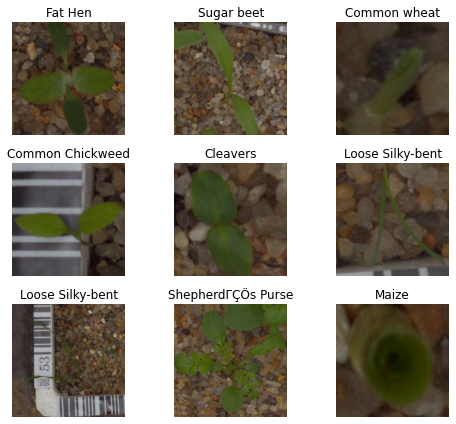

In [12]:
data.show_batch(rows=3, figsize=(7,6))

In [22]:
learner = create_cnn(data, models.resnet34, metrics=[accuracy], callback_fns=ShowGraph)
#Callbacks- Keeps a record of all the metrics that are needed to be tracked like accuracy with different parameters

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


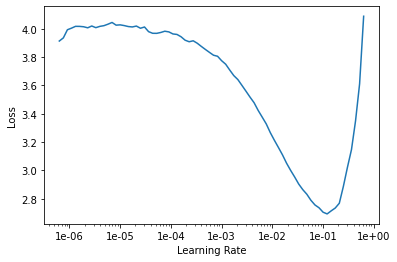

In [23]:
learner.lr_find() 
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.259090,0.345701,0.900632,01:18
1,1.153592,17.735926,0.388437,01:21
2,3.420688,1.571414,0.861789,01:23
3,2.599926,4.947027,0.644083,01:25
4,1.454512,1.069039,0.837398,01:24
5,0.937462,0.485867,0.896116,01:22
6,0.514284,0.276038,0.927733,01:21
7,0.376030,0.315843,0.919603,01:19


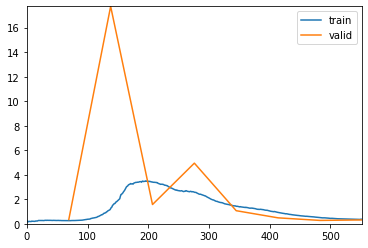

'\nx - number of steps\ny - loss\nnumber of steps per epoch = training_size / batch_size\n'

In [27]:
learner.fit_one_cycle(8, max_lr=slice(1e-2, 1e-1))
'''
x - number of steps
y - loss
number of steps per epoch = training_size / batch_size
'''

In [0]:
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


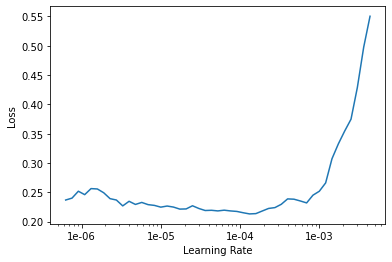

In [17]:
learner.lr_find() 
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.223667,0.223414,0.925023,01:17
1,0.214594,0.213298,0.926829,01:17
2,0.211117,0.204359,0.926829,01:16
3,0.186940,0.194653,0.940379,01:16
4,0.168817,0.190845,0.943993,01:16
5,0.147527,0.182398,0.937669,01:16
6,0.137114,0.181260,0.937669,01:16
7,0.136089,0.184763,0.941283,01:19


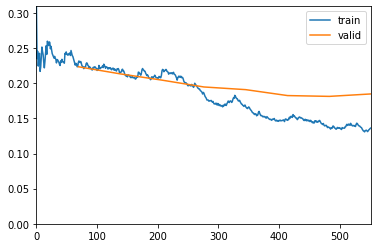

In [18]:
learner.fit_one_cycle(8, max_lr=slice(1e-5, 1e-4)) 
#We will take the learning rate based on the plot got from recorder_plot
#Slice is used for proportionately distributing:
#Left most layer will have lr as e-5, right most layer will have lr as e-4
#All layers in between will have propotionally lr between e-5 and e-4

In [0]:
learner.save('my_best_weights')

In [21]:
learner.load('my_best_weights')

Learner(data=ImageDataBunch;

Train: LabelList (4432 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Charlock,Charlock,Charlock,Charlock,Charlock
Path: /content/plant-seedlings-data;

Valid: LabelList (1107 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Common Chickweed,Sugar beet,Maize,Cleavers,Loose Silky-bent
Path: /content/plant-seedlings-data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal